# TBroad 고객 이탈 예측(Churn Expectation) 

여러 column중 ['계약상태']를 예측하는 model로 <br><br>
나머지의 column들을 가지고 계약상태를 예측한다.<br><br>
여기서 계약상태의 구성은 '사용중' 또는 '해지'로 나뉜다.

## 1. Data Preparation

### (1). Data Upload

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Tbroad/20180905_데이터 POC 자료_1만건.xlsx")
df2 = pd.read_excel("Tbroad/20180905_데이터 POC 자료_5000건.xlsx")
data = df.append(df2, ignore_index=True)

### (2). Data Check 

In [3]:
data.describe()

,순번,계열사ID,고객번호,나이,계약번호,계약사용일수,계약최초시작일,계약종료일,상품변경회수,일시정지회수,...,VOD_4개월에서12개월,미납개월,미납금액,약정시작일,약정종료일,약정개월,할인시작일,할인종료일,은행월별출금실패횟수_3개월이내,카드월별출금실패횟수_3개월이내
count,15000.000000,15000.0,1.500000e+04,15000.000000,1.500000e+04,15000.000000,1.500000e+04,2.431000e+03,15000.000000,15000.000000,...,15000.000000,15000.000000,12849.000000,1.499800e+04,1.499800e+04,14998.000000,1.443700e+04,1.443700e+04,206.000000,199.000000
mean,7500.500000,3400.0,2.824842e+09,52.958667,3.997015e+09,739.811867,2.016178e+07,2.018002e+07,0.196333,0.089733,...,4.092533,1.010733,20855.054635,2.016740e+07,2.019711e+07,35.585545,2.016741e+07,8.308148e+07,15.160194,14.090452
std,4330.271354,0.0,1.705622e+09,14.506175,2.126142e+08,697.958821,1.929359e+04,5.612490e+03,0.448925,1.453211,...,55.145631,0.602751,29831.037799,1.598148e+04,1.616397e+04,3.346175,1.557682e+04,3.258913e+07,13.741110,12.276357
min,1.000000,3400.0,5.016500e+04,13.000000,1.007345e+08,0.000000,2.011010e+07,2.011082e+07,0.000000,0.000000,...,0.000000,0.000000,30.000000,2.006082e+07,2.008112e+07,0.000000,2.006070e+07,2.012053e+07,1.000000,1.000000
25%,3750.750000,3400.0,1.002950e+09,43.000000,4.009370e+09,68.000000,2.015031e+07,2.018072e+07,0.000000,0.000000,...,0.000000,1.000000,8690.000000,2.016051e+07,2.019042e+07,36.000000,2.016032e+07,9.999123e+07,4.250000,4.000000
50%,7500.500000,3400.0,4.018385e+09,53.000000,4.012347e+09,530.500000,2.017031e+07,2.018081e+07,0.000000,0.000000,...,0.000000,1.000000,12240.000000,2.017083e+07,2.020082e+07,36.000000,2.017082e+07,9.999123e+07,12.000000,10.000000
75%,11250.250000,3400.0,4.031107e+09,62.000000,4.013834e+09,1273.000000,2.018063e+07,2.018082e+07,0.000000,0.000000,...,0.000000,1.000000,21020.000000,2.018072e+07,2.021072e+07,36.000000,2.018072e+07,9.999123e+07,23.750000,18.000000
max,15000.000000,3400.0,4.034181e+09,162.000000,4.014073e+09,2800.000000,2.018090e+07,2.018090e+07,5.000000,96.000000,...,6209.000000,7.000000,564300.000000,2.018090e+07,2.022090e+07,48.000000,2.018090e+07,9.999123e+07,74.000000,51.000000


In [4]:
data.shape

(15000, 55)

In [5]:
data.head()

,순번,계열사ID,고객번호,고객신분,요주의고객,고객유치구분,고객유형,나이,성별,계약번호,...,약정3개월도래여부,약정시작일,약정종료일,약정개월,할인3개월도래여부,할인시작일,할인종료일,은행월별출금실패횟수_3개월이내,카드월별출금실패횟수_3개월이내,해지사유
0,1,3400,4006896630,일반,Y,TM,아파트(관리번호必),64,남성,4007337469,...,NaN,20140325.0,20170324.0,36.0,Y,20180901.0,20180905.0,NaN,NaN,TV 볼 사람 없음
1,2,3400,1015154638,일반,N,사업부직영,일반주택(단독/다세대 등),58,남성,4013627924,...,NaN,20180418.0,20210417.0,36.0,NaN,20180418.0,99991231.0,NaN,NaN,NaN
2,3,3400,111185668,일반,N,SO,일반주택(단독/다세대 등),70,남성,4014071475,...,NaN,20180905.0,20210904.0,36.0,NaN,20180905.0,99991231.0,NaN,NaN,NaN
3,4,3400,4032627486,일반,N,영업센터,일반주택(단독/다세대 등),51,남성,4013488690,...,NaN,20180301.0,20210228.0,36.0,NaN,20180301.0,99991231.0,NaN,NaN,NaN
4,5,3400,111424455,일반,NaN,SO,일반주택(단독/다세대 등),64,여성,4014070505,...,NaN,20180905.0,20210904.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN


### (3). Delete Useless Columns in Data

#### 1) 필요없는 column 제거

##### - 관련없는 Column들 제거

'순번', '계열사ID', '고객번호', '계약번호', '해지사유'는 필요없다고 판단하에 제거<br><br>
'계약최초시작일', '계약종료일'은 계약사용일수에 표현되므로 제거

In [6]:
data.columns

Index(['순번', '계열사ID', '고객번호', '고객신분', '요주의고객', '고객유치구분', '고객유형', '나이', '성별',
       '계약번호', '서비스구분', '건물구분', '계약상태', '계약사용일수', '계약최초시작일', '계약종료일', '계약유치구분',
       'NM_PROD', '상품구분', '계약유형', '계약자와설치접수인관계', '전자청약여부', '단단결합유무', '결재방법',
       '상품변경회수', '일시정지회수', '직권일시정지회수', '부가상품개수', 'IP수', '민원상담_3개월이내',
       '민원상담_4개월에서12개월', '요금상담_3개월이내', '요금상담_4개월에서12개월', '해지상담_단순문의_3개월이내',
       '해지상담_단순문의_4-12개월', '해지상담_단순문의제외_3이내', '해지상담_단순문의제외_4-12개월',
       '명의변경_3개월이내', '명의변경_4개월에서12개월', 'AS접수_3개월이내', 'AS접수_4개월에서12개월',
       'VOD_3개월이내', 'VOD_4개월에서12개월', '미납개월', '미납금액', '약정3개월도래여부', '약정시작일',
       '약정종료일', '약정개월', '할인3개월도래여부', '할인시작일', '할인종료일', '은행월별출금실패횟수_3개월이내',
       '카드월별출금실패횟수_3개월이내', '해지사유'],
      dtype='object')

In [7]:
data = data.drop(['순번', '계열사ID', '고객번호', '계약번호', '해지사유', '계약최초시작일', '계약종료일'], axis=1)

In [8]:
data.shape

(15000, 48)

#### 2) 병합가능한  Column들 합치기

[민원상담, 요금상담, 해지상담_단순문의, 해지상담_단순문의제외, 명의변경, AS접수, VOD]<br><br>
경우에 3개월이내 및 4개월에서 12개월내로 나누어져 있어 두 column을 AVG값으로 합치려 한다.<br><br>
3개월이내의 값에는 1.5를 곱하고 4개월에서 12개월이내 값에는 8을 곱하여 column을 병합한다.

In [9]:
data['민원상담'] = data['민원상담_3개월이내']*1.5 + data['민원상담_4개월에서12개월']*8
data['요금상담'] = data['요금상담_3개월이내']*1.5 + data['요금상담_4개월에서12개월']*8
data['해지상담_단순문의'] = data['해지상담_단순문의_3개월이내']*1.5 + data['해지상담_단순문의_4-12개월']*8
data['해지상담_단순문의제외'] = data['해지상담_단순문의제외_3이내']*1.5 + data['해지상담_단순문의제외_4-12개월']*8
data['명의변경'] = data['명의변경_3개월이내']*1.5 + data['명의변경_4개월에서12개월']*8
data['AS접수'] = data['AS접수_3개월이내']*1.5 + data['AS접수_4개월에서12개월']*8
data['VOD'] = data['VOD_3개월이내']*1.5 + data['VOD_4개월에서12개월']*8

In [10]:
data = data.drop(['민원상담_3개월이내', '민원상담_4개월에서12개월', '요금상담_3개월이내', '요금상담_4개월에서12개월', '해지상담_단순문의_3개월이내', 
                  '해지상담_단순문의_4-12개월', '해지상담_단순문의제외_3이내', '해지상담_단순문의제외_4-12개월', '명의변경_3개월이내',
                 '명의변경_4개월에서12개월', 'AS접수_3개월이내', 'AS접수_4개월에서12개월', 'VOD_3개월이내', 'VOD_4개월에서12개월'], axis=1)

In [11]:
data.shape

(15000, 41)

In [12]:
data['NM_PROD'].value_counts()

HD베이직                      5199
HD이코노미                     4289
스마트스페셜(H)                  1872
기가세이브                       911
이코노미실속형                     800
HD프리미엄                      589
I-DIGITAL HD_2012           358
i-DIGITAL HD                143
베이직실속형                      129
Biz-HD베이직[단]                 69
기가인터넷                        63
Biz-HD베이직                    62
Biz-HD베이직[결]                 59
New HD이코노미                   50
스마트그린(H)                     46
Biz 메트로 2017                 38
I-DIGITAL SD_2012_HD전환       30
(신)아카데미 기가세이브                24
(신)아카데미파워100M                24
스마트스페셜(F)                    23
Biz-Metro_2015               21
Biz-Idigital HD basic        20
기가인터넷(O)                     20
스마트스페셜(O)                    20
Biz-HD베이직 (020)              17
파워(H)                        15
I-DIGITAL HD(prem)_2012      14
(신)파워 100M                   12
아카데미파워100M                   12
i-DIGITAL(SD)_HD전환           10
Biz-Metro(PON)               10
아카데미파워 기

#### 3) 대부분의 Value가 일치하고 극소수의 다른 Value가 있는 column제거

10000중에 개부분의 값이 99.8% 존재하면 나머지의 값은 매우 미세하여 noise로 인식해도 될것이라 생각하여 제거

In [13]:
data['계약자와설치접수인관계'].value_counts()

본인     14972
자         10
배우자       10
모          6
부          1
형제         1
Name: 계약자와설치접수인관계, dtype: int64

In [14]:
list = data['은행월별출금실패횟수_3개월이내'].value_counts()
data['은행월별출금실패횟수_3개월이내'].value_counts()

2.0     22
6.0     16
1.0     14
28.0    11
12.0    11
4.0      9
15.0     9
10.0     8
24.0     7
8.0      7
32.0     7
3.0      7
17.0     7
18.0     7
20.0     7
7.0      6
5.0      5
34.0     4
30.0     4
26.0     4
51.0     4
16.0     4
74.0     3
13.0     3
11.0     3
14.0     3
39.0     3
40.0     2
9.0      2
19.0     2
35.0     2
25.0     1
22.0     1
23.0     1
Name: 은행월별출금실패횟수_3개월이내, dtype: int64

In [15]:
sum(list)

206

98.62% 일치

In [16]:
list = data['카드월별출금실패횟수_3개월이내'].value_counts()
data['카드월별출금실패횟수_3개월이내'].value_counts()

18.0    22
1.0     20
2.0     17
8.0     17
30.0    11
16.0    11
4.0     10
3.0      9
7.0      8
46.0     8
9.0      8
15.0     7
23.0     6
32.0     6
6.0      6
22.0     5
12.0     5
24.0     3
10.0     3
51.0     3
5.0      3
20.0     2
11.0     2
36.0     2
27.0     1
17.0     1
19.0     1
13.0     1
28.0     1
Name: 카드월별출금실패횟수_3개월이내, dtype: int64

In [17]:
sum(list)

199

98.5%일치

In [18]:
data['상품구분'].value_counts()

일반        14652
Biz 상품      307
HD전환         41
Name: 상품구분, dtype: int64

In [19]:
data['민원상담'].value_counts()

0.0     14506
1.5       300
8.0       144
3.0        19
9.5        13
16.0       11
11.0        2
6.0         2
4.5         1
17.5        1
32.0        1
Name: 민원상담, dtype: int64

98.24% 일치

Majority값이 전체 10000개중에 9800개(98%)이상이거나 NULL값이 98%이상인 경우 골라 제거하였다

In [20]:
picked=[]
for col in data.columns:
    l = data[col].value_counts()
    mx = max(l)
    mx = max(mx, 15000-sum(l))
    per = mx/15000
    if per>0.975:
        picked.append(col)
    print("Column: {0}\nMax_Percent: {1}\n".format(col, per))
print("Picked: {0}".format(picked))

Column: 고객신분
Max_Percent: 0.9890666666666666

Column: 요주의고객
Max_Percent: 0.6742666666666667

Column: 고객유치구분
Max_Percent: 0.30093333333333333

Column: 고객유형
Max_Percent: 0.6590666666666667

Column: 나이
Max_Percent: 0.03266666666666666

Column: 성별
Max_Percent: 0.56

Column: 서비스구분
Max_Percent: 0.7904666666666667

Column: 건물구분
Max_Percent: 0.5670666666666667

Column: 계약상태
Max_Percent: 0.8379333333333333

Column: 계약사용일수
Max_Percent: 0.007066666666666666

Column: 계약유치구분
Max_Percent: 0.3774666666666667

Column: NM_PROD
Max_Percent: 0.3466

Column: 상품구분
Max_Percent: 0.9768

Column: 계약유형
Max_Percent: 0.6537333333333334

Column: 계약자와설치접수인관계
Max_Percent: 0.9981333333333333

Column: 전자청약여부
Max_Percent: 0.7410666666666667

Column: 단단결합유무
Max_Percent: 0.6928

Column: 결재방법
Max_Percent: 0.7953333333333333

Column: 상품변경회수
Max_Percent: 0.8228

Column: 일시정지회수
Max_Percent: 0.9848

Column: 직권일시정지회수
Max_Percent: 0.8878666666666667

Column: 부가상품개수
Max_Percent: 0.3636666666666667

Column: IP수
Max_Percent: 0.790

In [21]:
data = data.drop(picked, axis=1)

In [22]:
data.shape

(15000, 33)

##### - 추후 비슷한 목록예상

['고객유치구분', '고객유형']<br>['건물구분']<br>['계약유치구분', '계약유형']

In [23]:
def f(x):    
   return 'yes' if x['고객유형'] == x['계약유형'] else 'no'

data['일치여부'] = data.apply(f, axis=1)

In [24]:
data['일치여부'].value_counts()

yes    14803
no       197
Name: 일치여부, dtype: int64

In [25]:
print("Percent: {}".format(data['일치여부'].value_counts()['yes']/15000))

Percent: 0.9868666666666667


In [26]:
data = data.drop(['고객유형', '건물구분'], axis=1)

In [27]:
def f(x):    
   return 'yes' if x['약정시작일'] == x['할인시작일'] else 'no'

data['일치여부'] = data.apply(f, axis=1)
data['일치여부'].value_counts()

yes    11035
no      3965
Name: 일치여부, dtype: int64

In [28]:
data.columns

Index(['요주의고객', '고객유치구분', '나이', '성별', '서비스구분', '계약상태', '계약사용일수', '계약유치구분',
       'NM_PROD', '계약유형', '전자청약여부', '단단결합유무', '결재방법', '상품변경회수', '직권일시정지회수',
       '부가상품개수', 'IP수', '미납개월', '미납금액', '약정3개월도래여부', '약정시작일', '약정종료일',
       '할인3개월도래여부', '할인시작일', '할인종료일', '민원상담', '요금상담', '해지상담_단순문의',
       '해지상담_단순문의제외', 'AS접수', 'VOD', '일치여부'],
      dtype='object')

약정, 할일 column합치기

In [29]:
import datetime

date = '20' + datetime.date.today().strftime("%y%m%d")

In [30]:
date

'20180914'

In [31]:
data['약정종료일'].astype(str).value_counts()['nan']

2

In [32]:
data['약정종료일'] = data['약정종료일'].fillna(0).astype(int).astype(str)
data['할인종료일'] = data['할인종료일'].fillna(0).astype(int).astype(str)

In [33]:
def changecontract(data):
    
    date = '20' + datetime.date.today().strftime("%y%m%d")
    if data['약정종료일']=='0':
        contract = 0
    else:
        contract = ((int(data['약정종료일'][:4])-int(date[:4]))*365) + ((int(data['약정종료일'][4:6])-int(date[4:6]))*30) + (int(data['약정종료일'][6:])-int(date[6:]))

    return contract

def changediscount(data):
    
    date = '20' + datetime.date.today().strftime("%y%m%d")
    if data['할인종료일'] == '99991231':
        discount = 3650
    elif data['할인종료일'] == '0':
        discount = '0'
    else:
        discount = ((int(data['할인종료일'][:4])-int(date[:4]))*365) + ((int(data['할인종료일'][4:6])-int(date[4:6]))*30) + (int(data['할인종료일'][6:])-int(date[6:]))
    
    return discount

In [34]:
data['약정'] = data.apply(changecontract, axis=1)
data['할인'] = data.apply(changediscount, axis=1)

In [35]:
data = data.drop(['할인3개월도래여부', '할인시작일', '할인종료일', '약정3개월도래여부', '약정시작일', '약정종료일', '일치여부'], axis=1)

In [36]:
data.shape

(15000, 27)

In [37]:
data.columns

Index(['요주의고객', '고객유치구분', '나이', '성별', '서비스구분', '계약상태', '계약사용일수', '계약유치구분',
       'NM_PROD', '계약유형', '전자청약여부', '단단결합유무', '결재방법', '상품변경회수', '직권일시정지회수',
       '부가상품개수', 'IP수', '미납개월', '미납금액', '민원상담', '요금상담', '해지상담_단순문의',
       '해지상담_단순문의제외', 'AS접수', 'VOD', '약정', '할인'],
      dtype='object')

str classified 된 경우
<br>['고객유치구분', '성별', '서비스구분', '계약유치구분', 'NM_PROD', '계약유형', '결재방법']

##### - 추후 연관된 column예상

['미납개월', '미납금액']

##### - 추후 비슷한 목록예상

['약정3개월도래여부', '약정시작일', '약정종료일']<br>['할인3개월도래여부', '할인시작일', '할인종료일']

### (4). Cleaning & Editing values in columns 

In [38]:
# min-max normalize function
# input = (dataframe)
# output = transformed dataframe

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

#### 1) 요주의고객

{'Y':1, 'N':0, np.nan:0}<br>
****임시적으로 NaN값은 0으로 matching시켰지만 실제project에선 고민필요

In [39]:
data['요주의고객']=data['요주의고객'].replace('Y',1).replace('N',0).fillna(0)

In [40]:
data['요주의고객'].value_counts()

0.0    13497
1.0     1503
Name: 요주의고객, dtype: int64

#### 2) 성별 

In [41]:
data['성별'].value_counts()

남성    8400
여성    6600
Name: 성별, dtype: int64

두가지 방법 존재<br>
1. Is_man, Is_woman column을 만들어 0,1로 구성
2. man, woman을 특정값에 mapping시켜 특정값으로 변환

#### 3) 서비스구분

In [42]:
data['서비스구분'].value_counts()

DIGITAL     11857
INTERNET     3143
Name: 서비스구분, dtype: int64

위의 성별과 마찬가지로 두가지 방법중 1가지 선택

#### 4) 결재방법

In [43]:
data['결재방법'].value_counts()

은행자동이체    11930
지로         1987
신용카드       1083
Name: 결재방법, dtype: int64

위와 동일

#### 5) 계약상태

우리가 측정하고 싶은 output값으로 '사용중'이면 1 '해지'면 0으로 mapping하여<br>
결과값으로 예측 할 것이다.

In [44]:
data['계약상태'].value_counts()

사용중    12569
해지      2431
Name: 계약상태, dtype: int64

In [45]:
data['계약상태']=data['계약상태'].replace('사용중',1).replace('해지',0)

In [46]:
data['계약상태'].value_counts()

1    12569
0     2431
Name: 계약상태, dtype: int64

#### 6) 전자청약여부, 단단결합유무

위 두 column은 Y와 NaN으로 구성되어 있고 NaN은 결국 N을 의미한다.<br>
따라서 Y일경우 1로 matching하고 NaN일경우 0으로 matching한다.

In [47]:
data['전자청약여부'].value_counts()

Y    11116
Name: 전자청약여부, dtype: int64

In [48]:
data['단단결합유무'].value_counts()

Y    4608
Name: 단단결합유무, dtype: int64

In [49]:
data['전자청약여부'] = data['전자청약여부'].replace("Y",1).fillna(0)
data['단단결합유무'] = data['단단결합유무'].replace('Y',1).fillna(0)

In [50]:
data['전자청약여부'].value_counts()

1.0    11116
0.0     3884
Name: 전자청약여부, dtype: int64

In [51]:
data['단단결합유무'].value_counts()

0.0    10392
1.0     4608
Name: 단단결합유무, dtype: int64

#### 7) IP수, 미납금액

위 두 column에는 0이 NaN으로 표기되어있어 NaN에 0을 넣어준다.

In [52]:
data['IP수'] = data['IP수'].fillna(0)
data['미납금액'] = data['미납금액'].fillna(0)

In [53]:
data['IP수'].value_counts()

0.0     11857
1.0      2925
2.0       133
8.0        23
6.0        10
3.0         9
5.0         6
9.0         5
20.0        5
10.0        5
12.0        4
7.0         4
11.0        3
30.0        1
18.0        1
4.0         1
16.0        1
14.0        1
32.0        1
17.0        1
22.0        1
13.0        1
15.0        1
24.0        1
Name: IP수, dtype: int64

In [54]:
sum(data['IP수'].value_counts())

15000

In [55]:
data['미납금액'].value_counts()

0.0         2151
8800.0       620
11000.0      617
9900.0       585
7700.0       538
14300.0      334
16500.0      320
6600.0       311
12100.0      301
13200.0      203
15400.0      199
17600.0      197
19800.0      173
18700.0      118
5500.0       111
22000.0       81
5390.0        72
10950.0       70
8690.0        60
20900.0       46
24200.0       45
11550.0       40
23100.0       39
1100.0        39
8510.0        39
25300.0       37
7450.0        32
350.0         31
28600.0       29
9350.0        27
            ... 
61030.0        1
71399.0        1
68810.0        1
28930.0        1
39990.0        1
22520.0        1
133595.0       1
125380.0       1
6050.0         1
43000.0        1
18747.0        1
219604.0       1
11400.0        1
30010.0        1
115050.0       1
38515.0        1
42740.0        1
55675.0        1
182729.0       1
40720.0        1
26425.0        1
26020.0        1
58333.0        1
37220.0        1
23760.0        1
5080.0         1
15840.0        1
33180.0       

In [56]:
sum(data['미납금액'].value_counts())

15000

In [57]:
data['미납개월'].value_counts()

1    10964
0     2151
2     1510
3      335
4       30
5        9
7        1
Name: 미납개월, dtype: int64

In [58]:
sum(data['부가상품개수'].value_counts())

15000

['고객유치구분', '성별', '서비스구분', '계약유치구분', 'NM_PROD', '계약유형', '결재방법']

In [59]:
data

,요주의고객,고객유치구분,나이,성별,서비스구분,계약상태,계약사용일수,계약유치구분,NM_PROD,계약유형,...,미납개월,미납금액,민원상담,요금상담,해지상담_단순문의,해지상담_단순문의제외,AS접수,VOD,약정,할인
0,1.0,TM,64,남성,DIGITAL,0,1624,CS1,HD베이직,아파트(관리번호必),...,1,6600.0,0.0,0.0,1.5,0.0,0.0,0.0,-535,-9
1,0.0,사업부직영,58,남성,DIGITAL,1,140,CS1,이코노미실속형,일반주택(단독/다세대 등),...,2,9580.0,0.0,0.0,0.0,0.0,0.0,16.0,948,3650
2,0.0,SO,70,남성,DIGITAL,1,0,영업센터,HD이코노미,일반주택(단독/다세대 등),...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1085,3650
3,0.0,영업센터,51,남성,INTERNET,1,188,영업센터,스마트스페셜(H),일반주택(단독/다세대 등),...,1,14300.0,0.0,0.0,0.0,0.0,3.0,0.0,899,3650
4,0.0,SO,64,여성,INTERNET,1,0,마케팅팀,스마트스페셜(H),일반주택(단독/다세대 등),...,0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,1085,0
5,0.0,SO,84,남성,DIGITAL,1,649,영업센터,HD이코노미,원룸/빌라/오피스텔/소형아파트 등,...,1,6600.0,1.5,0.0,30.0,28.5,0.0,0.0,435,3650
6,0.0,영업센터,30,남성,INTERNET,1,344,영업센터,기가세이브,일반주택(단독/다세대 등),...,1,18700.0,0.0,0.0,1.5,1.5,16.0,0.0,741,3650
7,0.0,영업전문점,60,남성,DIGITAL,1,2518,영업전문점,HD베이직,아파트(관리번호必),...,1,10950.0,0.0,0.0,0.0,0.0,0.0,0.0,257,3650
8,0.0,SO,46,남성,DIGITAL,1,0,영업센터,이코노미실속형,아파트(관리번호必),...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1085,3650
9,1.0,유통점,48,여성,DIGITAL,1,1754,유통점,HD이코노미,아파트(관리번호必),...,1,11000.0,0.0,0.0,0.0,0.0,0.0,0.0,-669,3650


In [60]:
data['고객유치구분'].value_counts()

영업센터               4514
SO                 2833
CS1                2503
TM                 1289
유통점                 995
고객협력사               732
영업전문점               380
사업부직영               379
운영_안양_가입(C)         371
마케팅팀                318
가입상담C               196
지점                   95
고객관리                 79
운영_리텐션 메타넷(C)        34
운영_상담(C)             33
운영_대구센터_변경요금(C)      32
고객지원팀                22
CS2                  18
한빛서비스                14
기술팀                  11
운영_디지털(C)             9
해지스킬                  7
MIG                   6
전송망                   5
직영O/B                 5
운영_스탭(C)              3
운영_유치(C)              3
해지스킬_수원               2
MSO                   2
고객관리팀                 2
HIB                   2
인사팀                   2
해지스킬_부산               2
직영위탁점                 2
시화센터                  2
한빛시흥서비스               1
해지스킬_한빛               1
안산센터                  1
하나정보통신                1
운영_부천_가입(C)           1
한빛씨앤엠                 1
관리회계팀           

In [61]:
data['NM_PROD'].value_counts()

HD베이직                      5199
HD이코노미                     4289
스마트스페셜(H)                  1872
기가세이브                       911
이코노미실속형                     800
HD프리미엄                      589
I-DIGITAL HD_2012           358
i-DIGITAL HD                143
베이직실속형                      129
Biz-HD베이직[단]                 69
기가인터넷                        63
Biz-HD베이직                    62
Biz-HD베이직[결]                 59
New HD이코노미                   50
스마트그린(H)                     46
Biz 메트로 2017                 38
I-DIGITAL SD_2012_HD전환       30
(신)아카데미 기가세이브                24
(신)아카데미파워100M                24
스마트스페셜(F)                    23
Biz-Metro_2015               21
Biz-Idigital HD basic        20
기가인터넷(O)                     20
스마트스페셜(O)                    20
Biz-HD베이직 (020)              17
파워(H)                        15
I-DIGITAL HD(prem)_2012      14
(신)파워 100M                   12
아카데미파워100M                   12
i-DIGITAL(SD)_HD전환           10
Biz-Metro(PON)               10
아카데미파워 기

In [62]:
data['계약유형'].value_counts()

일반주택(단독/다세대 등)           9806
아파트(관리번호必)               4329
원룸/빌라/오피스텔/소형아파트 등        428
임대주택(5회선 이상 주거용 단체계약)     222
기타                         68
소단체(5회선 이상 개인사업자)          53
SM(5회선~100회선 법인)           50
상가 등(5회선 미만_개인/법인/공공)      41
공공(5회선 이상 공공)               2
Name: 계약유형, dtype: int64

In [63]:
def contracttype(data):
    if data['계약유형'] != r'아파트(관리번호必)' and  data['계약유형'] != r'일반주택(단독/다세대 등)':
        return '계약_기타'
    else:
        return data['계약유형']
data['계약유형_change'] = data.apply(contracttype, axis=1)
data['계약유형'] = data['계약유형_change']
#(data['계약유형'] != r'일반주택(단독/다세대 등)') or (
#data['계약유형_change'] = np.where(data['계약유형'] != (r'일반주택(단독/다세대 등)' or r'아파트(관리번호必)'), '계약_기타', data['계약유형'])

In [64]:
data = data.drop('계약유형_change', axis=1)

In [65]:
data['계약유형'].value_counts()

일반주택(단독/다세대 등)    9806
아파트(관리번호必)        4329
계약_기타              865
Name: 계약유형, dtype: int64

In [66]:
data['서비스구분'].value_counts()

DIGITAL     11857
INTERNET     3143
Name: 서비스구분, dtype: int64

In [67]:
data['결재방법'].value_counts()

은행자동이체    11930
지로         1987
신용카드       1083
Name: 결재방법, dtype: int64

In [68]:
nominal_columns = ["결재방법", "서비스구분", "성별", "계약유형"]
dummy_df = pd.get_dummies(data[nominal_columns])
filtered_df = pd.concat([data, dummy_df], axis=1)
filtered_df = filtered_df.drop(nominal_columns, axis=1)

In [69]:
df = filtered_df.drop(['계약유치구분', "고객유치구분", "NM_PROD"], axis=1)

In [70]:
df.columns

Index(['요주의고객', '나이', '계약상태', '계약사용일수', '전자청약여부', '단단결합유무', '상품변경회수',
       '직권일시정지회수', '부가상품개수', 'IP수', '미납개월', '미납금액', '민원상담', '요금상담',
       '해지상담_단순문의', '해지상담_단순문의제외', 'AS접수', 'VOD', '약정', '할인', '결재방법_신용카드',
       '결재방법_은행자동이체', '결재방법_지로', '서비스구분_DIGITAL', '서비스구분_INTERNET', '성별_남성',
       '성별_여성', '계약유형_계약_기타', '계약유형_아파트(관리번호必)', '계약유형_일반주택(단독/다세대 등)'],
      dtype='object')

In [71]:
df.isnull().values.any()

False

In [72]:
df=df.astype(float)

In [73]:
def checkstr(df):
    for col in df.columns:
        print(col)
        print(df[col].dtype)
checkstr(df)

요주의고객
float64
나이
float64
계약상태
float64
계약사용일수
float64
전자청약여부
float64
단단결합유무
float64
상품변경회수
float64
직권일시정지회수
float64
부가상품개수
float64
IP수
float64
미납개월
float64
미납금액
float64
민원상담
float64
요금상담
float64
해지상담_단순문의
float64
해지상담_단순문의제외
float64
AS접수
float64
VOD
float64
약정
float64
할인
float64
결재방법_신용카드
float64
결재방법_은행자동이체
float64
결재방법_지로
float64
서비스구분_DIGITAL
float64
서비스구분_INTERNET
float64
성별_남성
float64
성별_여성
float64
계약유형_계약_기타
float64
계약유형_아파트(관리번호必)
float64
계약유형_일반주택(단독/다세대 등)
float64


#### >>> MIN - MAX Normalization 

In [74]:
result = normalize(df)

In [75]:
result.head()

,요주의고객,나이,계약상태,계약사용일수,전자청약여부,단단결합유무,상품변경회수,직권일시정지회수,부가상품개수,IP수,...,결재방법_신용카드,결재방법_은행자동이체,결재방법_지로,서비스구분_DIGITAL,서비스구분_INTERNET,성별_남성,성별_여성,계약유형_계약_기타,계약유형_아파트(관리번호必),계약유형_일반주택(단독/다세대 등)
0,1.0,0.342282,0.0,0.580000,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.302013,1.0,0.050000,1.0,0.0,0.0,0.0,0.008584,0.00000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.382550,1.0,0.000000,0.0,0.0,0.0,0.0,0.004292,0.00000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.255034,1.0,0.067143,1.0,1.0,0.0,0.0,0.000000,0.03125,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.342282,1.0,0.000000,0.0,1.0,0.4,0.0,0.000000,0.09375,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [76]:
result.describe()

,요주의고객,나이,계약상태,계약사용일수,전자청약여부,단단결합유무,상품변경회수,직권일시정지회수,부가상품개수,IP수,...,결재방법_신용카드,결재방법_은행자동이체,결재방법_지로,서비스구분_DIGITAL,서비스구분_INTERNET,성별_남성,성별_여성,계약유형_계약_기타,계약유형_아파트(관리번호必),계약유형_일반주택(단독/다세대 등)
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.100200,0.268179,0.837933,0.264219,0.741067,0.307200,0.039267,0.011995,0.008044,0.008335,...,0.072200,0.795333,0.132467,0.790467,0.209533,0.560000,0.440000,0.057667,0.288600,0.653733
std,0.300276,0.097357,0.368524,0.249271,0.438064,0.461348,0.089785,0.052572,0.018032,0.029039,...,0.258827,0.403471,0.339009,0.406989,0.406989,0.496403,0.496403,0.233120,0.453127,0.475795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.201342,1.000000,0.024286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.268456,1.000000,0.189464,1.000000,0.000000,0.000000,0.000000,0.004292,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.328859,1.000000,0.454643,1.000000,1.000000,0.000000,0.000000,0.008584,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


****************Data 전처리 완료******************

## 2. Modeling

### (1). training set과 test set 나누기 

우선 전체 15000개에서<br>
Training set => 13000개<br>
Test set => 2000개로 나누었다.

In [78]:
train=result.iloc[:13000,:]

In [79]:
test = result.iloc[13000:,:]

In [80]:
train_x = train.loc[:, train.columns != '계약상태']
train_y = train['계약상태']
test_x = test.loc[:, test.columns != '계약상태']
test_y = test['계약상태']

In [392]:
train_x

,요주의고객,나이,계약사용일수,전자청약여부,단단결합유무,상품변경회수,직권일시정지회수,부가상품개수,IP수,미납개월,...,결재방법_신용카드,결재방법_은행자동이체,결재방법_지로,서비스구분_DIGITAL,서비스구분_INTERNET,성별_남성,성별_여성,계약유형_계약_기타,계약유형_아파트(관리번호必),계약유형_일반주택(단독/다세대 등)
0,1.0,0.342282,0.580000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.142857,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.302013,0.050000,1.0,0.0,0.0,0.000000,0.008584,0.00000,0.285714,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.382550,0.000000,0.0,0.0,0.0,0.000000,0.004292,0.00000,0.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.255034,0.067143,1.0,1.0,0.0,0.000000,0.000000,0.03125,0.142857,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.342282,0.000000,0.0,1.0,0.4,0.000000,0.000000,0.09375,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.476510,0.231786,1.0,0.0,0.0,0.000000,0.004292,0.00000,0.142857,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,0.114094,0.122857,1.0,1.0,0.0,0.000000,0.004292,0.03125,0.142857,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7,0.0,0.315436,0.899286,0.0,0.0,0.2,0.000000,0.000000,0.00000,0.142857,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.221477,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.234899,0.626429,0.0,0.0,0.0,0.000000,0.008584,0.00000,0.142857,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### (3). Model 돌리기

#### - 간단한 모델을 이용한 정확도 Check

In [393]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi = logi.fit(train_x,train_y)

In [395]:
logi.score(test_x,test_y)

0.83999999999999997

대략 정확도가 나쁘지 않게 나온거 같으므로 제대로 model돌리기

#### - Random Forest Classifier

기본 모델에서 model fitting한 후 accuracy check

In [396]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x,train_y)
clf.score(test_x,test_y)

예측값 구하기

In [404]:
clf_pred=clf.predict(test_x)

Precision & Recall curve with each value

Average precision-recall score: 0.9974
Recall score: 0.9952


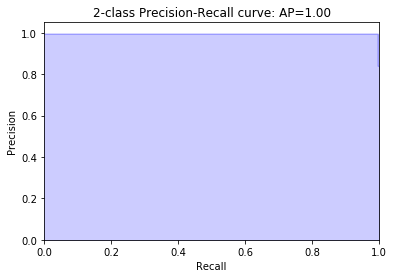

In [428]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, recall_score
average_precision = average_precision_score(test_y, clf_pred)
rec_score = recall_score(clf_pred, test_y)

print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))
print("Recall score: {0:0.5f}".format(rec_score))
precision, recall, _ = precision_recall_curve(test_y, clf_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.5f}'.format(
          average_precision))

learning curve graph 보기

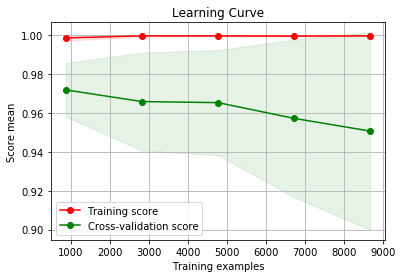

In [403]:
%matplotlib inline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn_evaluation import plot
train_sizes, train_scores, test_scores = learning_curve(clf, train_x, train_y)
plot.learning_curve(train_scores, test_scores, train_sizes)

Feature Importance 구하기

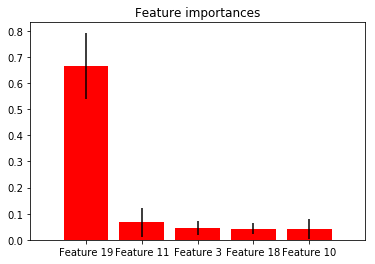

In [417]:
plot.feature_importances(clf, top_n=5)

In [426]:
values = sorted(zip(train_x.columns, clf.feature_importances_), key=lambda x: x[1] * -1)
for value in values:
    print(value)

('할인', 0.6660429147111373)
('미납금액', 0.06739029130475116)
('계약사용일수', 0.04547111415239069)
('약정', 0.042312934391353682)
('미납개월', 0.040750893488600524)
('해지상담_단순문의제외', 0.027867308153853066)
('해지상담_단순문의', 0.025239597723107743)
('나이', 0.013533480800103446)
('부가상품개수', 0.011161042413555932)
('VOD', 0.010927613401758209)
('요금상담', 0.0053499535957932179)
('AS접수', 0.0051377738623114375)
('IP수', 0.004808778892717129)
('전자청약여부', 0.0036220196788651687)
('직권일시정지회수', 0.0029930137972171813)
('성별_여성', 0.0026839447146112744)
('결재방법_지로', 0.0024844360545603671)
('성별_남성', 0.0024323132004453315)
('상품변경회수', 0.0023384651180750086)
('요주의고객', 0.0021720420652119811)
('계약유형_아파트(관리번호必)', 0.0021664691404223607)
('단단결합유무', 0.0021652085008694822)
('서비스구분_INTERNET', 0.0020921875045756735)
('결재방법_은행자동이체', 0.0018223300162994876)
('계약유형_일반주택(단독/다세대 등)', 0.0016565887413520094)
('계약유형_계약_기타', 0.0016306290661874221)
('결재방법_신용카드', 0.0014361523580475597)
('서비스구분_DIGITAL', 0.0013911010342111283)
('민원상담', 0.00091940211761513003)

#### - MLP Classifier

Model fitting with default values

In [400]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Accuracy

In [401]:
mlp.score(test_x,test_y)

0.95899999999999996

C:\Users\mslee\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\mslee\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\mslee\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\mslee\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\mslee\Anaconda3\lib\site-packages\sklearn\neura

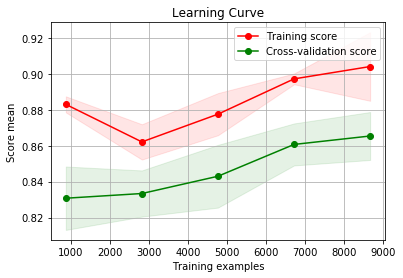

In [402]:
%matplotlib inline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn_evaluation import plot
train_sizes, train_scores, test_scores = learning_curve(mlp, train_x, train_y)
plot.learning_curve(train_scores, test_scores, train_sizes)

In [412]:
mlp_pred=mlp.predict(test_x)

Average precision-recall score: 0.99
Recall score: 0.97


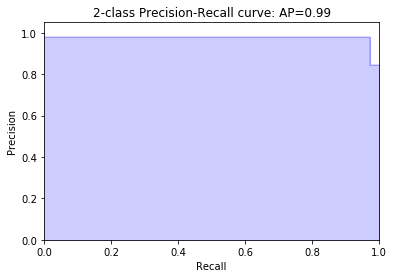

In [415]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, recall_score
average_precision = average_precision_score(mlp_pred, test_y)
rec_score = recall_score(mlp_pred, test_y)

print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))
print("Recall score: {0:0.5f}".format(rec_score))
precision, recall, _ = precision_recall_curve(mlp_pred, test_y)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.5f}'.format(
          average_precision))

#### - Error Handling

위에선 정확도가 너무 높아 오류가 거의 없었는데 그 이유를 분석해본 결과 할인이라는 항목이 계약중이라면 99991231로 되어있는 경우가 높아 이 항목을 빼고 다시 modeling을 하는게 맞다고 생각하여 빼고 측정해보았다.

In [81]:
imp = ['할인', '계약상태']
notimp =[item for item in result.columns.tolist() if item not in imp]
train_x0 = train.loc[:, train.columns.isin(notimp)]
# train_x0 = train_x0.loc[:, train_x0.columns != '계약상태']
train_y0 = train['계약상태']
test_x0 = test.loc[:, test.columns.isin(notimp)]
# test_x0 = test_x0.loc[:, test_x0.columns != '계약상태']
test_y0 = test['계약상태']

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x0,train_y0)
clf.score(test_x0,test_y0)

0.94299999999999995

In [122]:
clf_pred = clf.predict(test_x0)

In [89]:
test_y0.value_counts()

1.0    1678
0.0     322
Name: 계약상태, dtype: int64

In [93]:
unique, counts = np.unique(clf_pred, return_counts=True)
dict(zip(unique, counts))

{0.0: 340, 1.0: 1660}

In [123]:
clf_df = pd.DataFrame({"예측값": clf_pred, "실제값": test_y0})

In [124]:
clf_df

,실제값,예측값
13000,1.0,1.0
13001,1.0,1.0
13002,0.0,0.0
13003,1.0,1.0
13004,1.0,1.0
13005,1.0,1.0
13006,1.0,1.0
13007,1.0,1.0
13008,1.0,1.0
13009,1.0,1.0


전체에서 예측 성공값과 비성공값 check

In [125]:
def chec(df):
    return True if df['예측값']==df['실제값'] else False
clf_df['ISEQUAL'] = clf_df.apply(chec, axis=1)

In [126]:
clf_df['ISEQUAL'].value_counts()

True     1918
False      82
Name: ISEQUAL, dtype: int64

실제 해지일때 예측한 결과 확인

In [127]:
clf_df0 = clf_df[clf_df['실제값'] == 0]

In [128]:
clf_df0['ISEQUAL'].value_counts()

True     267
False     55
Name: ISEQUAL, dtype: int64

실제 계약중일때 예측결과 확인

In [129]:
clf_df1 = clf_df[clf_df['실제값'] == 1]

In [130]:
clf_df1['ISEQUAL'].value_counts()

True     1651
False      27
Name: ISEQUAL, dtype: int64

Feature Importance보기

In [119]:
values = sorted(zip(train_x.columns, clf.feature_importances_), key=lambda x: x[1] * -1)
for value in values:
    print(value)

('미납금액', 0.23768561749735734)
('약정', 0.13646286869215279)
('계약사용일수', 0.09511020973665911)
('해지상담_단순문의제외', 0.091302145951487376)
('나이', 0.069365686900068349)
('해지상담_단순문의', 0.056283658526989508)
('미납개월', 0.053926249491511979)
('부가상품개수', 0.041899448348385368)
('VOD', 0.030580245056321297)
('요금상담', 0.022981093797770837)
('AS접수', 0.019598794225900149)
('단단결합유무', 0.013596472235698506)
('직권일시정지회수', 0.010778937180119397)
('성별_남성', 0.0099718366979779406)
('계약유형_아파트(관리번호必)', 0.0099199630917677587)
('서비스구분_INTERNET', 0.0094783782105798357)
('성별_여성', 0.0090850524649785797)
('상품변경회수', 0.0090293565119069132)
('IP수', 0.0083162561323868976)
('결재방법_신용카드', 0.0082028836369072416)
('요주의고객', 0.0081320092454119988)
('계약유형_계약_기타', 0.0080504098565386418)
('민원상담', 0.0079705661919809018)
('전자청약여부', 0.0079589564536088689)
('결재방법_은행자동이체', 0.0073601715293149014)
('서비스구분_DIGITAL', 0.007036061792024509)
('할인', 0.0051056740716644653)
('결재방법_지로', 0.0048109964725285186)


HyperParameter를 변경시켜 시도

In [121]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=25)
clf.fit(train_x0,train_y0)
clf.score(test_x0,test_y0)

0.95899999999999996

#### - 여러가지 중요항목을 빼고 측정

In [ ]:
imp = ['할인','미납금액', '계약사용일수','약정','미납개월','해지상담_단순문의제외', '해지상담_단순문의','나이','부가상품개수', 'VOD']
notimp =[item for item in result.columns.tolist() if item not in imp]
train_x2 = train.loc[:, train.columns.isin(notimp)]
train_x2 = train_x2.loc[:, train_x2.columns != '계약상태']
train_y2 = train['계약상태']
test_x2 = test.loc[:, test.columns.isin(notimp)]
test_x2 = test_x2.loc[:, test_x2.columns != '계약상태']
test_y2 = test['계약상태']

In [464]:
train_x2

,요주의고객,전자청약여부,단단결합유무,상품변경회수,직권일시정지회수,IP수,민원상담,요금상담,AS접수,결재방법_신용카드,결재방법_은행자동이체,결재방법_지로,서비스구분_DIGITAL,서비스구분_INTERNET,성별_남성,성별_여성,계약유형_계약_기타,계약유형_아파트(관리번호必),계약유형_일반주택(단독/다세대 등)
0,1.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.000000,0.00000,0.000000,0.0000,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.000000,0.03125,0.000000,0.0000,0.015666,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.4,0.000000,0.09375,0.000000,0.0000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0,0.000000,0.00000,0.046875,0.0000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.000000,0.03125,0.000000,0.0000,0.083551,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.2,0.000000,0.00000,0.000000,0.0000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.000000,0.00000,0.000000,0.0000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [465]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x2,train_y2)
clf.score(test_x2,test_y2)

0.81599999999999995

In [466]:
clf_pred = clf.predict(test_x2)

In [467]:
from sklearn.metrics import average_precision_score, recall_score
average_precision = average_precision_score(clf_pred, test_y2)
rec_score = recall_score(clf_pred, test_y2)

print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))
print("Recall score: {0:0.5f}".format(rec_score))

Average precision-recall score: 0.98028
Recall score: 0.83903


In [468]:
values = sorted(zip(train_x2.columns, clf.feature_importances_), key=lambda x: x[1] * -1)
for value in values:
    print(value)

('요금상담', 0.2378360808472228)
('AS접수', 0.22816787165189151)
('직권일시정지회수', 0.077681852592623307)
('상품변경회수', 0.06148625596975036)
('민원상담', 0.053800274139856621)
('단단결합유무', 0.045057072094012371)
('전자청약여부', 0.041163166135975683)
('요주의고객', 0.040756791560133544)
('성별_남성', 0.029117480032780842)
('계약유형_일반주택(단독/다세대 등)', 0.024045600308629726)
('성별_여성', 0.02355667329221494)
('IP수', 0.023259192154153528)
('계약유형_아파트(관리번호必)', 0.022378383113057752)
('결재방법_지로', 0.022183346162031638)
('결재방법_은행자동이체', 0.021569428357441051)
('계약유형_계약_기타', 0.019692491098936515)
('결재방법_신용카드', 0.017886260781986581)
('서비스구분_INTERNET', 0.007174119063681342)
('서비스구분_DIGITAL', 0.0031876606436198702)


In [469]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(train_x2,train_y2)
mlp.score(test_x2,test_y2)

0.83399999999999996

In [470]:
mlp_pred=mlp.predict(test_x2)

In [471]:
from sklearn.metrics import average_precision_score, recall_score
average_precision = average_precision_score(mlp_pred, test_y2)
rec_score = recall_score(mlp_pred, test_y2)

print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))
print("Recall score: {0:0.5f}".format(rec_score))

Average precision-recall score: 0.99473
Recall score: 0.83990


역시나 결과가 좋지 않음을 볼 수 있었다.<br>
기본 비율이 85%가까이 되는걸 봐서는 상당히 좋지않는 결과이다

#### - Top n개만을 가지고 학습

In [131]:
imp = ['미납금액', '계약사용일수','약정','미납개월','해지상담_단순문의제외', '해지상담_단순문의','나이','부가상품개수', 'VOD']
train_x3 = train.loc[:, train.columns.isin(imp)]
train_y3 = train['계약상태']
test_x3 = test.loc[:, test.columns.isin(imp)]

test_y3 = test['계약상태']

In [137]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=25)
clf.fit(train_x3,train_y3)
clf.score(test_x3,test_y3)

0.95050000000000001

In [133]:
clf_pred = clf.predict(test_x3)

In [134]:
from sklearn.metrics import average_precision_score, recall_score
average_precision = average_precision_score(clf_pred, test_y3)
rec_score = recall_score(clf_pred, test_y3)

print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))
print("Recall score: {0:0.5f}".format(rec_score))

Average precision-recall score: 0.97560
Recall score: 0.97330


In [474]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(train_x3,train_y3)
mlp.score(test_x3,test_y3)

C:\Users\mslee\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.97350000000000003

In [475]:
mlp_pred = mlp.predict(test_x3)

In [479]:
from sklearn.metrics import average_precision_score, recall_score
average_precision = average_precision_score(mlp_pred, test_y3)
rec_score = recall_score(mlp_pred, test_y3)

print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))
print("Recall score: {0:0.5f}".format(rec_score))

Average precision-recall score: 0.99359
Recall score: 0.97822


#### - 여러 Models Check

In [143]:
imp = ['미납금액', '계약사용일수','약정','미납개월','해지상담_단순문의제외', '해지상담_단순문의','나이','부가상품개수', 'VOD']
result_x = result.loc[:, result.columns.isin(imp)]
result_y = result['계약상태']

In [155]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = result_x, result_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) 
best=(0,0)
for clf, name in zip(classifiers, names):
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score > best[1]:
        best=(name,score)
    print("{0}: {1:0.5f}%".format(name,score))
print("Best Model: {0}\n Accuracy: {1:0.5f}%".format(best[0],best[1]))

Nearest Neighbors: 0.79033%
Linear SVM: 0.84700%
RBF SVM: 0.84700%


MemoryError: 